# LIGO - Gravitational Waves Detectability

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [5]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\y_ds.npy")

In [6]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\data_ds.npy")

In [7]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\keys.npy")

Take a look at class balance

In [8]:
print('Classes ratio : ', y[y==1].shape[0]/y[y==0].shape[0])

Classes ratio :  0.16461887847202003


In [9]:
data.mean(axis=1)

array([54.62510578,  7.08029103, 69.38442213, ..., 21.27342182,
       30.18463891, 43.11454956], shape=(20000,))

Data needs to be scaled first

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
S = StandardScaler().fit_transform(data)

## Dimensionality Reduction: PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=S.shape[1])
P = pca.fit_transform(S)

Text(0, 0.5, 'Explained variance ratio')

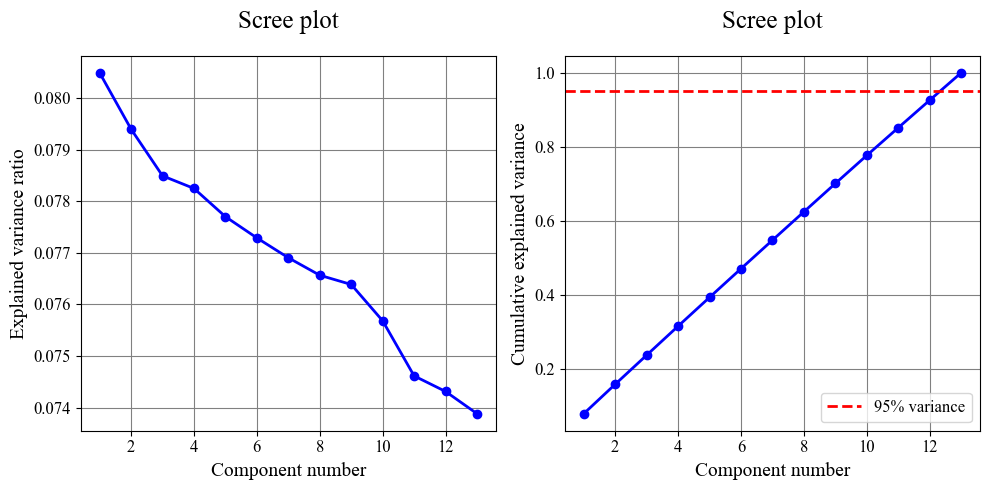

In [14]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

This probably means that data correlation is highly non linear

## Supervised Classification: Linear Discriminant Analysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic
from sklearn.model_selection import train_test_split

In [30]:
S_train, S_test, y_train, y_test = train_test_split(P, y, test_size=0.25, shuffle=True, stratify=y)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


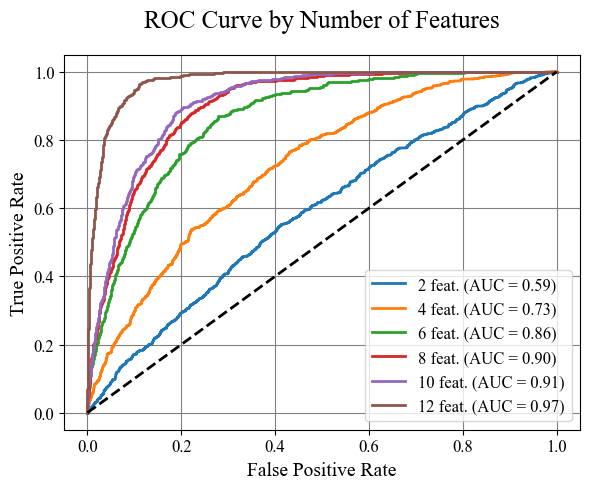

In [31]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LDA())

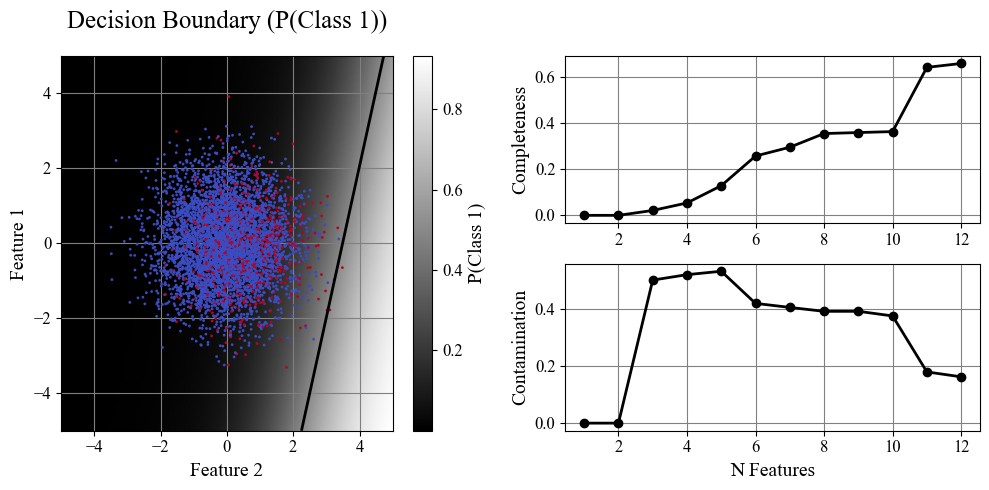

In [46]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-5,5,-5,5],
                                 f=1, a=1, b=2)

## Quadratic Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


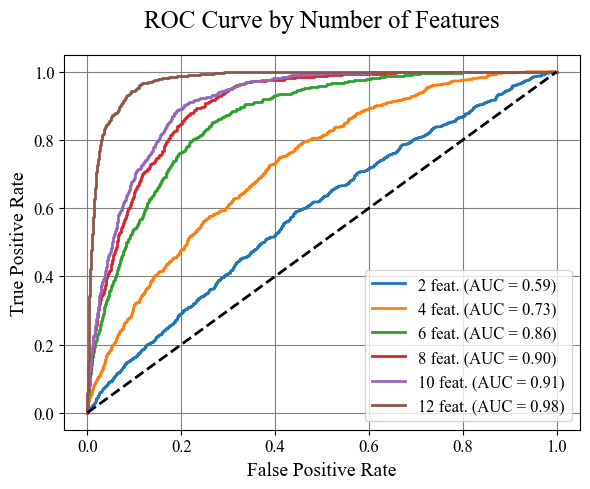

In [49]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, QDA())

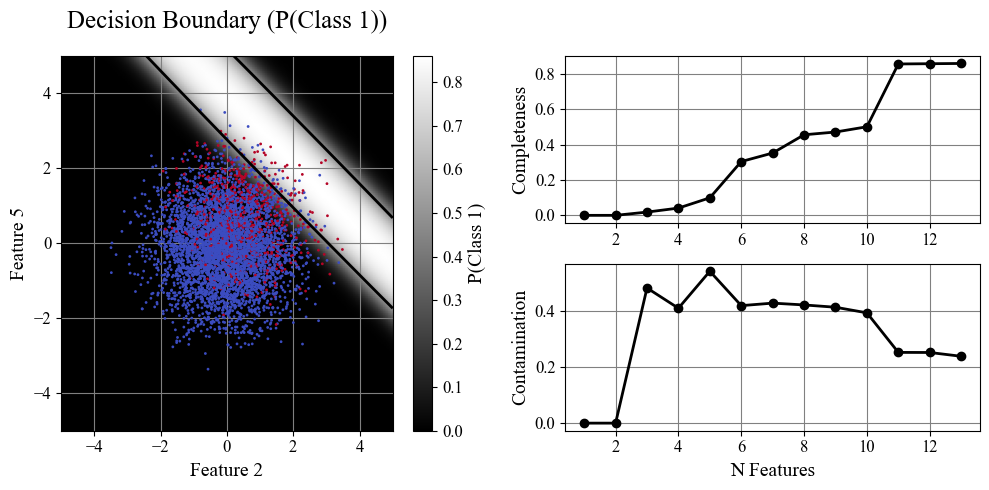

In [52]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-5,5,-5,5],
                                 f=1, a=5, b=2)

## GMM - Bayes

In [ ]:
from astroML.classification import GMMBayes
from Utilities.Classify_vs import evaluate_gmm_classifier, visualize_classification

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWar

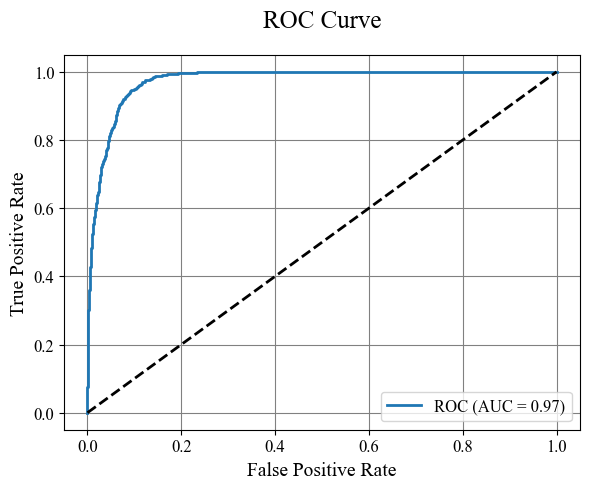

In [57]:
result = evaluate_gmm_classifier(S_train, S_test, y_train, y_test, GMMBayes, 12, True)

In [61]:
result['classifiers'][1][1]

TypeError: 'GMMBayes' object is not subscriptable

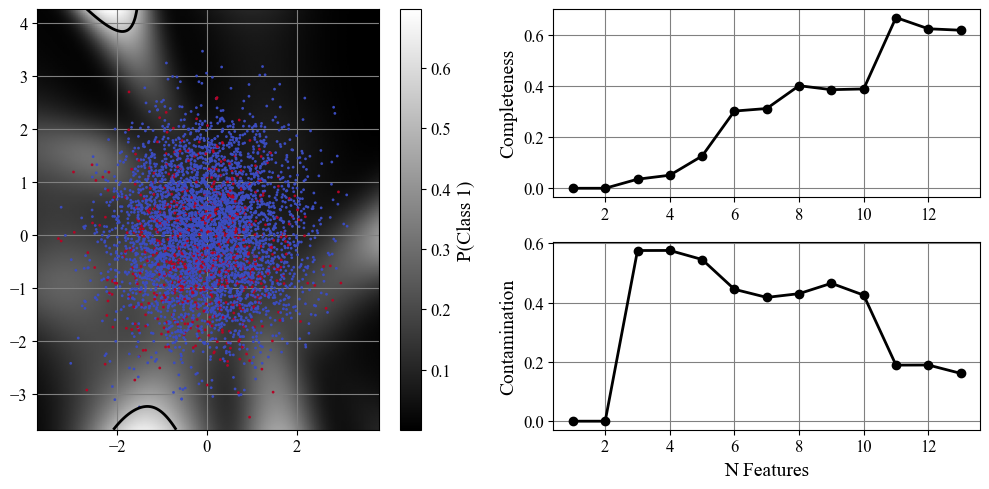

In [75]:
visualize_classification(S_test, y_test,
                         result['classifiers'][1],
                         result['completeness'],
                         result['contamination'],
                         f=1, a=1, b=0)

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier as KNC

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


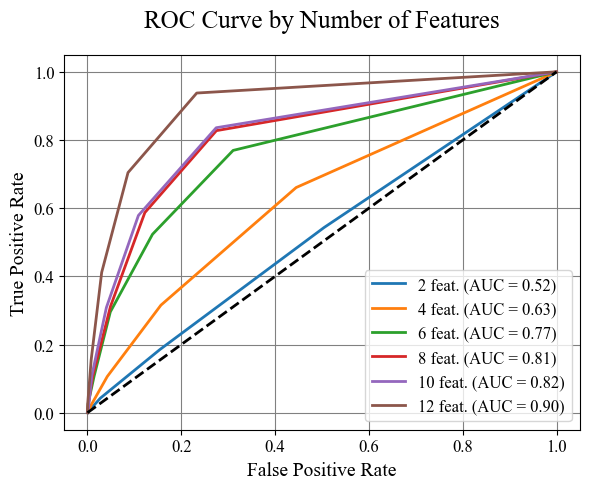

In [77]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, KNC())

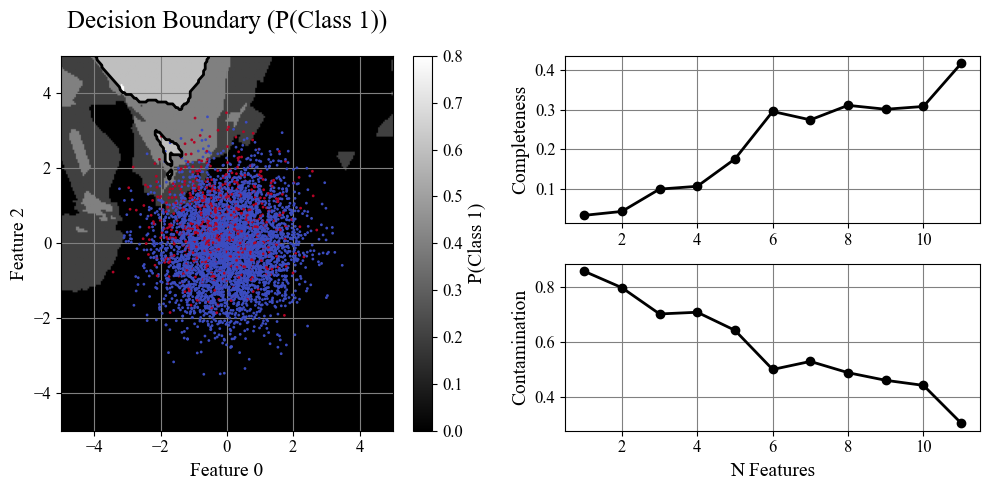

In [85]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-5,5,-5,5],
                                 f=1, a=2, b=0)